**HW10 Finding Shortest Path in a Directed Graph** - Parth Ingale


This algorithm helps find the shortest path from a starting vertex (called the source)
to all other vertices in a directed graph with weights (costs) on the edges.

1. We create a distance array where we store the shortest known distance to each vertex.
   At the start, we set all distances to infinity (because we don’t know them yet),
   except the source, which is set to 0 (since we’re already there).

2. Then we go through every edge in the graph and check:
   “If we already know the distance to the first vertex in the edge,
   can we use this edge to get a shorter path to the second vertex?”

   If yes, we update that second vertex’s distance.

3. We repeat this process nV times (where nV = number of vertices),
   so we’re sure that even longer paths with more hops get updated.

In the end, the distance array gives us the shortest distance from the source
to every other vertex.


In [1]:
def shortest_path_dp(graph, nV, nE, s):
    """
    Finds the shortest paths from source vertex `s` to all others using dynamic programming.

    Parameters:
    graph : list of tuples (u, v, w)
        A list of edges, each represented as (from, to, weight).
    nV : int
        Number of vertices.
    nE : int
        Number of edges.
    s : int
        Source vertex.

    Returns:
    list
        Shortest distances from the source vertex to each other vertex (1-indexed).
    """
    #Initialize distance array
    dist = [float('inf')] * (nV + 1)  # +1 because we are using 1-based indexing
    dist[s] = 0  # Distance to source is 0

    #Relax all edges nV times
    for _ in range(nV):
        for u, v, w in graph:
            if dist[u] + w < dist[v]:
                dist[v] = dist[u] + w

    return dist[1:]  # Removing the dummy 0th index


In [2]:
# Directed graph edges with weights
edges = [
    (1, 2, 5), (1, 3, 3), (2, 3, 2), (2, 4, 6), (3, 4, 7), (3, 5, 4), (4, 5, 1),
    (1, 6, 2), (2, 7, 3), (3, 8, 4), (4, 9, 5), (5, 10, 6), (6, 7, 2), (7, 8, 3),
    (8, 9, 4), (9, 10, 5), (10, 6, 6), (6, 5, 5), (2, 5, 1), (3, 6, 2)
]

# Graph parameters
nV = 10
nE = 20
source = 1

# Compute shortest distances
shortest_distances = shortest_path_dp(edges, nV, nE, source) #required crucial concept

# Printing the results
print("Shortest distances from Vertex 1 to all other vertices:")
for i, d in enumerate(shortest_distances, start=1):
    print(f"Vertex {i}: {d}")


Shortest distances from Vertex 1 to all other vertices:
Vertex 1: 0
Vertex 2: 5
Vertex 3: 3
Vertex 4: 10
Vertex 5: 6
Vertex 6: 2
Vertex 7: 4
Vertex 8: 7
Vertex 9: 11
Vertex 10: 12


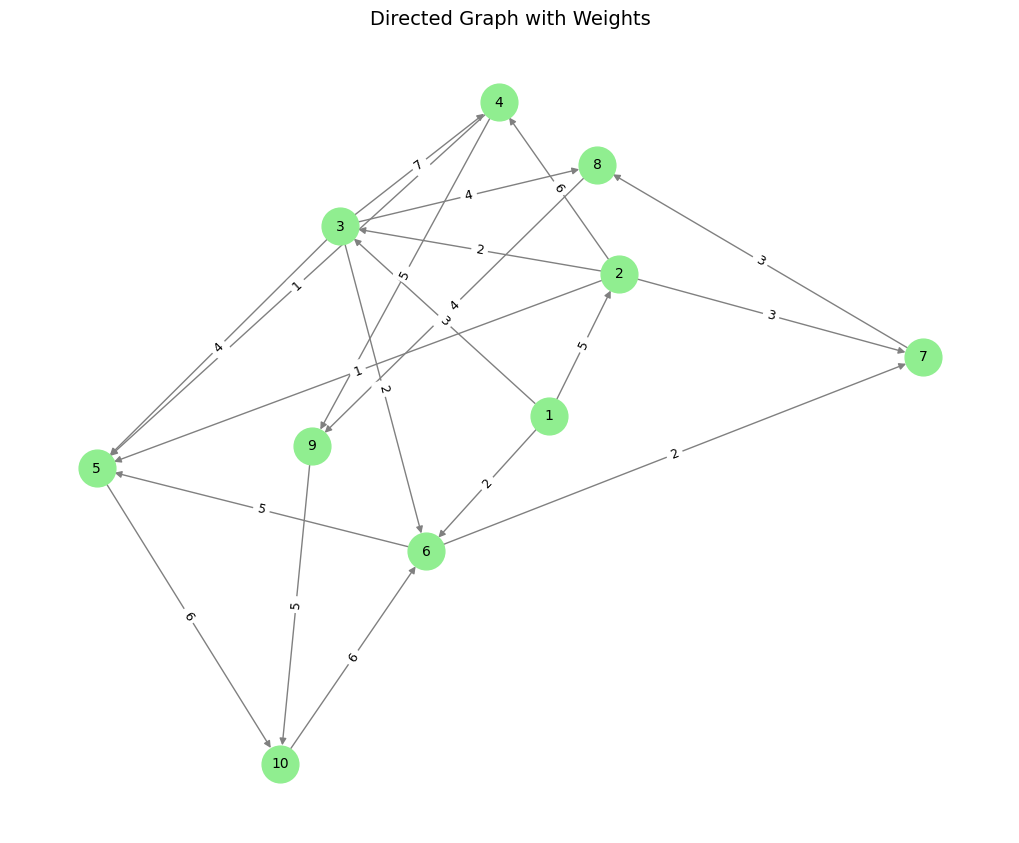

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# directed graph edges with weights
edges = [
    (1, 2, 5), (1, 3, 3), (2, 3, 2), (2, 4, 6), (3, 4, 7), (3, 5, 4), (4, 5, 1),
    (1, 6, 2), (2, 7, 3), (3, 8, 4), (4, 9, 5), (5, 10, 6), (6, 7, 2), (7, 8, 3),
    (8, 9, 4), (9, 10, 5), (10, 6, 6), (6, 5, 5), (2, 5, 1), (3, 6, 2)
]

# Creating a directed graph
G = nx.DiGraph()
G.add_weighted_edges_from(edges)

# Draw the graph
pos = nx.spring_layout(G)
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_color='lightgreen', edge_color='gray',
        node_size=700, font_size=10, arrows=True)

# Adding edge weights as labels
labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=9)

# Show the plot
plt.title("Directed Graph with Weights", fontsize=14)
plt.axis('off')
plt.show()
